# New Tork Times Article Search API

_What are APIs?_

Structured ways people can give you their data.

_Why?_

Usually because they want to help web/mobile developers attract more users to their service.

They want developers to build apps to drive more eyeballs to their service.

![NYTimes_search](https://raw.githubusercontent.com/OlekRomanko/teaching/master/images/NY_Times.png)

Web scraping is difficult and disallowed by many web-sites.

![](https://raw.githubusercontent.com/OlekRomanko/teaching/master/images/NY_Times1.png)

In [1]:
import requests

Sign up to be a [developer](http://developer.nytimes.com) with the New York Times and get your own API key.

In [2]:
my_times_api_key = 'akPbMQkxVVzkgAvMaeOYMbsYytPFlUAY'

APIs can be accessed like a normal URL, but they are often very long, complicated, and involve variables you want to change. For example, you can get the information about the first 10 articles published in the New York Times that used the word "Canada" with:

[http://api.nytimes.com/svc/search/v2/articlesearch.json?sort=newest&begin_date=20180101&end_date=20190831&api-key=akPbMQkxVVzkgAvMaeOYMbsYytPFlUAY&q=Canada&page=0](http://api.nytimes.com/svc/search/v2/articlesearch.json?sort=newest&begin_date=20180101&end_date=20190831&api-key=akPbMQkxVVzkgAvMaeOYMbsYytPFlUAY&q=Canada&page=0)

`Requests` allows you to do this in a more civilized way.

In [3]:
payload = {'q'         : 'Canada', 
           'begin_date': '20230101' ,
           'end_date'  : '20230831',
           'api-key'   :  my_times_api_key,
           'sort'      : 'oldest' ,
           'offset'    :  20}

base_url = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?'

In [4]:
r = requests.get(base_url, params = payload)

#r.url

In [5]:
r.text

'{"status":"OK","copyright":"Copyright (c) 2023 The New York Times Company. All Rights Reserved.","response":{"docs":[{"abstract":"As American companies seek to limit their exposure to the pitfalls of making goods in China, some are moving production to Mexico.","web_url":"https://www.nytimes.com/2023/01/01/business/mexico-china-us-trade.html","snippet":"As American companies seek to limit their exposure to the pitfalls of making goods in China, some are moving production to Mexico.","lead_paragraph":"As American companies recalibrate the risks of relying on Chinese factories to make their goods, some are shifting business to a country far closer to home: Mexico.","print_section":"A","print_page":"1","source":"The New York Times","multimedia":[{"rank":0,"subtype":"xlarge","caption":null,"credit":null,"type":"image","url":"images/2022/12/27/multimedia/00china-mexico-1-3c37/00china-mexico-1-3c37-articleLarge.jpg","height":400,"width":600,"legacy":{"xlarge":"images/2022/12/27/multimedia/0

In [6]:
r.json()

{'status': 'OK',
 'copyright': 'Copyright (c) 2023 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'abstract': 'As American companies seek to limit their exposure to the pitfalls of making goods in China, some are moving production to Mexico.',
    'web_url': 'https://www.nytimes.com/2023/01/01/business/mexico-china-us-trade.html',
    'snippet': 'As American companies seek to limit their exposure to the pitfalls of making goods in China, some are moving production to Mexico.',
    'lead_paragraph': 'As American companies recalibrate the risks of relying on Chinese factories to make their goods, some are shifting business to a country far closer to home: Mexico.',
    'print_section': 'A',
    'print_page': '1',
    'source': 'The New York Times',
    'multimedia': [{'rank': 0,
      'subtype': 'xlarge',
      'caption': None,
      'credit': None,
      'type': 'image',
      'url': 'images/2022/12/27/multimedia/00china-mexico-1-3c37/00china-mexico-1-3c37-ar

In [7]:
json = r.json()

#### API response

In [8]:
json.keys()

dict_keys(['status', 'copyright', 'response'])

In [9]:
json['status']

'OK'

Output from `json['response']` ommitted because it was quite long.

In [10]:
json['response']['docs']

[{'abstract': 'As American companies seek to limit their exposure to the pitfalls of making goods in China, some are moving production to Mexico.',
  'web_url': 'https://www.nytimes.com/2023/01/01/business/mexico-china-us-trade.html',
  'snippet': 'As American companies seek to limit their exposure to the pitfalls of making goods in China, some are moving production to Mexico.',
  'lead_paragraph': 'As American companies recalibrate the risks of relying on Chinese factories to make their goods, some are shifting business to a country far closer to home: Mexico.',
  'print_section': 'A',
  'print_page': '1',
  'source': 'The New York Times',
  'multimedia': [{'rank': 0,
    'subtype': 'xlarge',
    'caption': None,
    'credit': None,
    'type': 'image',
    'url': 'images/2022/12/27/multimedia/00china-mexico-1-3c37/00china-mexico-1-3c37-articleLarge.jpg',
    'height': 400,
    'width': 600,
    'legacy': {'xlarge': 'images/2022/12/27/multimedia/00china-mexico-1-3c37/00china-mexico-1-

Number of documents in `json['response']`:

In [11]:
len(json['response']['docs'])

10

Document 10 (index 9) from `json['response']`:

In [12]:
json['response']['docs'][9]

{'abstract': 'The adaptation for television depicts the mistreatment of First Nations people in Canada and has drawn praise for its unflinching realism.',
 'web_url': 'https://www.nytimes.com/2023/01/03/arts/television/three-pines-louise-penny.html',
 'snippet': 'The adaptation for television depicts the mistreatment of First Nations people in Canada and has drawn praise for its unflinching realism.',
 'lead_paragraph': 'Murder is as ubiquitous in “Three Pines,” the noirish Amazon series from the creators of “The Crown,” as the bone-chilling Canadian weather. But as the bodies pile up in a claustrophobic Quebec village, one discovery shakes the fictional community to its core: the graves of three dead Indigenous children, surreptitiously concealed in the basement of a former Victorian residential school.',
 'print_section': 'C',
 'print_page': '1',
 'source': 'The New York Times',
 'multimedia': [{'rank': 0,
   'subtype': 'xlarge',
   'caption': None,
   'credit': None,
   'type': 'ima

#### Document 10 title, lead paragraph, author, section, etc.

In [13]:
json['response']['docs'][9]['headline']

{'main': '‘Three Pines,’ Based on Louise Penny Books, Tackles Indigenous Suffering',
 'kicker': None,
 'content_kicker': None,
 'print_headline': 'Tackling Indigenous Suffering in Canada',
 'name': None,
 'seo': None,
 'sub': None}

In [14]:
json['response']['docs'][9]['snippet']

'The adaptation for television depicts the mistreatment of First Nations people in Canada and has drawn praise for its unflinching realism.'

In [15]:
json['response']['docs'][9]['lead_paragraph']

'Murder is as ubiquitous in “Three Pines,” the noirish Amazon series from the creators of “The Crown,” as the bone-chilling Canadian weather. But as the bodies pile up in a claustrophobic Quebec village, one discovery shakes the fictional community to its core: the graves of three dead Indigenous children, surreptitiously concealed in the basement of a former Victorian residential school.'

In [16]:
json['response']['docs'][9]['byline']

{'original': 'By Dan Bilefsky',
 'person': [{'firstname': 'Dan',
   'middlename': None,
   'lastname': 'Bilefsky',
   'qualifier': None,
   'title': None,
   'role': 'reported',
   'organization': '',
   'rank': 1}],
 'organization': None}

In [17]:
print("Section: " + json['response']['docs'][9]['section_name'] + "\nSubsection: " + json['response']['docs'][9]['subsection_name'])

Section: Arts
Subsection: Television


In [18]:
json['response']['docs'][9]['keywords']

[{'name': 'subject', 'value': 'Television', 'rank': 1, 'major': 'N'},
 {'name': 'creative_works',
  'value': 'Three Pines (TV Program)',
  'rank': 2,
  'major': 'N'},
 {'name': 'glocations', 'value': 'Canada', 'rank': 3, 'major': 'N'},
 {'name': 'subject', 'value': 'Indigenous People', 'rank': 4, 'major': 'N'},
 {'name': 'subject', 'value': 'Discrimination', 'rank': 5, 'major': 'N'},
 {'name': 'subject', 'value': 'Police', 'rank': 6, 'major': 'N'},
 {'name': 'organizations', 'value': 'Amazon.com Inc', 'rank': 7, 'major': 'N'},
 {'name': 'persons', 'value': 'Penny, Louise', 'rank': 8, 'major': 'N'},
 {'name': 'subject', 'value': 'Writing and Writers', 'rank': 9, 'major': 'N'}]

#### Total number of articles found by search

In [19]:
json['response']['meta']['hits']

1702

#### Total number of articles with "q=Canada" published each year between 2018 and 2022

In [26]:
from time import sleep

base_url = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?'

payload = { 'q'         : 'Canada', 
            'api-key'   :  my_times_api_key,
            'sort'      : 'newest' ,
            'page'      :  0}
    
years = [2018, 2019, 2020, 2021, 2022]
counts = []
for year in years: 
    year_string = str(year)
    payload['begin_date'] = year_string + '0101'
    payload['end_date']   = year_string + '1231'
    r = requests.get(base_url, params = payload)
    json = r.json()
    count  = json['response']['meta']['hits']
    print(count)
    counts.append(count)
    sleep(4)   

3393
3140
2860
2831
2638


This can be plotted in Python.

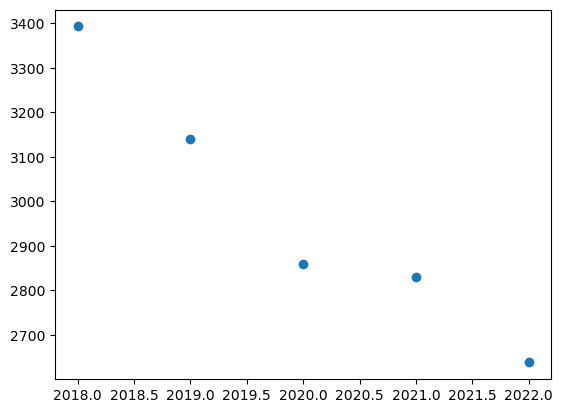

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(years,counts)
plt.ticklabel_format(useOffset=False)

Your turn. Modify the script above to output a csv with the monthly total of "Canada" articles. For an extra challenge, add an additional column with the count of the number of "Canada innovation" articles.